# 导入数据并对数据进行预处理

In [162]:
import pandas as pd
import numpy as np
import matplotlib as mpt
from matplotlib import pyplot as plt

moviesRawData = pd.read_csv('20191016_IMDB Movies_MetaData.csv', sep=",")

In [163]:
moviesRawData.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 缺失值处理

In [165]:
print("数据的形状是：", moviesRawData.shape)
# print(moviesRawData.info())

# 具体查询值为 null OR nan 的行
# nans = lambda df:df[df.isnull().any(axis=1)]
# movieName = pd.DataFrame(moviesRawData.movie_title)
# nans(movieName)

moviesRawData = moviesRawData.dropna(how="any")

moviesRawData.head()

# moviesRawData[moviesRawData['movie_title'] == "A Nightmare on Elm Street"]

数据的形状是： (3756, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


## 重复值处理

In [166]:
# 把所有的重复数据全部打印出来
# moviesRawData2 = pd.concat(g for _, g in moviesRawData.groupby(moviesRawData.movie_title) if len(g) > 1)
# moviesRawData2['movie_title'].sort_values(ascending=True)

moviesRawData2[moviesRawData.duplicated()]

# moviesRawData2.head()

# moviesRawData2[moviesRawData2['movie_title'] == "Across the Universe"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2798,Color,Shawn Levy,69.0,88.0,189.0,799.0,Donald Faison,934.0,47811275.0,Adventure|Comedy|Family,...,99.0,English,USA,PG,15000000.0,2002.0,927.0,5.4,1.85,896
3452,Color,Paul Haggis,287.0,115.0,549.0,911.0,Loretta Devine,3000.0,54557348.0,Crime|Drama|Thriller,...,1624.0,English,Germany,R,6500000.0,2004.0,912.0,7.9,2.35,18000
4769,Color,Tamra Davis,111.0,93.0,33.0,135.0,Katherine Boecher,1000.0,37188667.0,Comedy|Drama,...,578.0,English,USA,PG-13,12000000.0,2002.0,188.0,3.3,1.85,0
2777,Color,Stephen Frears,51.0,119.0,350.0,418.0,Peter Capaldi,18000.0,34700000.0,Drama|Romance,...,143.0,English,USA,R,14000000.0,1988.0,17000.0,7.7,1.85,0
2292,Color,Frank Oz,168.0,87.0,0.0,548.0,Ewen Bremner,22000.0,8579684.0,Comedy,...,199.0,English,USA,R,9000000.0,2007.0,557.0,7.4,1.85,0
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
3345,Color,Herbert Ross,60.0,107.0,71.0,304.0,Chris Penn,967.0,80000000.0,Drama|Music|Romance,...,113.0,English,USA,PG,8200000.0,1984.0,455.0,6.5,1.85,0
1449,Color,Albert Hughes,208.0,122.0,117.0,140.0,Jason Flemyng,40000.0,31598308.0,Horror|Mystery|Thriller,...,541.0,English,USA,R,35000000.0,2001.0,1000.0,6.8,2.35,0
4182,Color,Rob Zombie,220.0,119.0,0.0,593.0,Tyler Mane,908.0,33386128.0,Horror,...,491.0,English,USA,R,15000000.0,2009.0,764.0,4.9,1.85,3000
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000


limit_output extension: Maximum message size of 10000 exceeded with 18139 characters

In [115]:
# moviesRawData.duplicated()

moviesRawData.drop_duplicates()
# 此处默认删除的是某行与上一行完全一致的行，而非按子集来进行删除

# 按照指定列去除重复值
moviesRawData = moviesRawData.drop_duplicates('movie_title')

print(moviesRawData.shape)

(3655, 28)


## 异常值处理

Nothing

## 数据类型转换

Nothing

## 设置索引

Nothing

# 查看票房收入统计
	 

## 导演 VS 票房总收入
	 

In [121]:
group_director = moviesRawData.groupby(by='director_name')['gross'].sum()
print(group_director.sort_values(ascending=False))

director_name
Steven Spielberg       4.114233e+09
Michael Bay            2.195444e+09
James Cameron          1.948126e+09
Christopher Nolan      1.813228e+09
Peter Jackson          1.809883e+09
                           ...     
Paul Bunnell           2.436000e+03
Alex Craig Mann        1.332000e+03
Ricki Stern            1.111000e+03
Frank Whaley           7.030000e+02
Ekachai Uekrongtham    1.620000e+02
Name: gross, Length: 1659, dtype: float64


## 主演 VS 票房总收入

In [123]:
group_actor_01 = moviesRawData.groupby(by='actor_1_name')['gross'].sum()
print(group_actor_01.sort_values(ascending=False))

actor_1_name
Harrison Ford       3.391556e+09
Tom Hanks           3.264559e+09
Johnny Depp         3.244215e+09
Tom Cruise          2.907588e+09
Will Smith          2.762618e+09
                        ...     
Jim Carter          3.607000e+03
Stephen McHattie    3.478000e+03
Tatyana Ali         2.468000e+03
Kate Maberly        2.436000e+03
Darryl Hunt         1.111000e+03
Name: gross, Length: 1427, dtype: float64


## 导演 + 主演 VS 票房收入

In [124]:
group_actor_01_and_director = moviesRawData.groupby(by=['director_name','actor_1_name'])['gross'].sum()
print(group_actor_01_and_director.sort_values(ascending=False))

director_name          actor_1_name     
Gore Verbinski         Johnny Depp          1.250323e+09
George Lucas           Natalie Portman      1.165483e+09
Sam Raimi              J.K. Simmons         1.148783e+09
Joss Whedon            Chris Hemsworth      1.082271e+09
Francis Lawrence       Jennifer Lawrence    1.043416e+09
                                                ...     
Alex Craig Mann        Justin Chon          1.332000e+03
Ricki Stern            Darryl Hunt          1.111000e+03
Brian Trenchard-Smith  David Keith          7.210000e+02
Frank Whaley           Lynn Cohen           7.030000e+02
Ekachai Uekrongtham    Michael Jai White    1.620000e+02
Name: gross, Length: 3414, dtype: float64


# 查看评分统计
	

## 查看各 IMDB 评分的电影个数
	

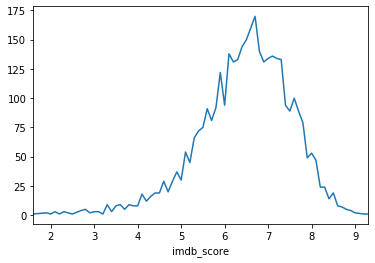

In [142]:
imdb_scores = moviesRawData.groupby('imdb_score')['movie_title'].count()
# imdb_scores
plt.figure()
imdb_scores.plot()
plt.savefig('./output/20191016imdb_scores.jpg')
plt.show()

## 查看平均 IMDB 评分最高的前 20 导演

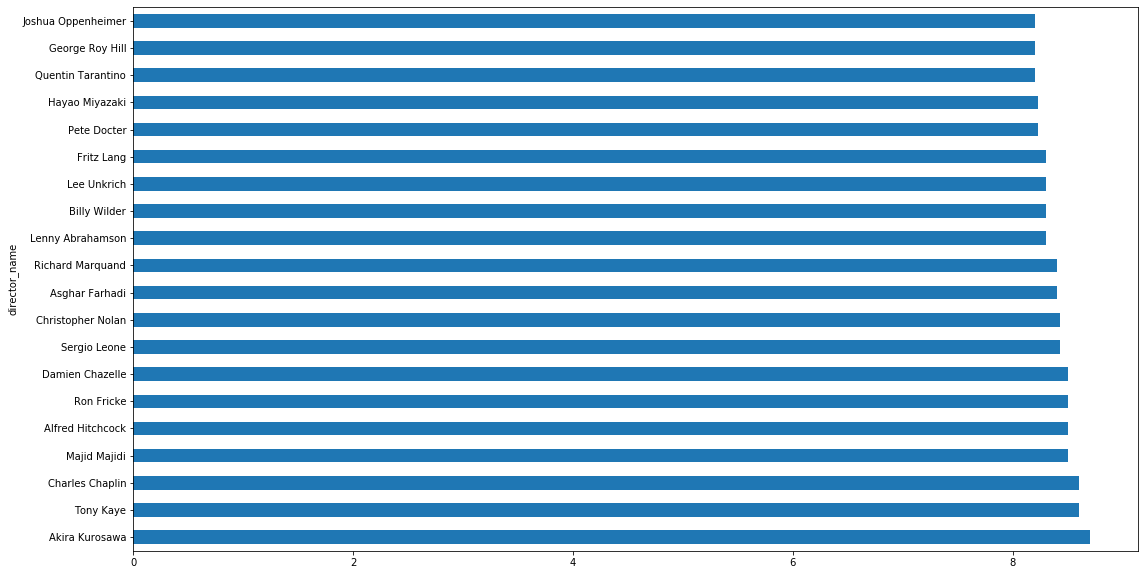

In [143]:
imdbTopDirector = moviesRawData.groupby(by='director_name')['imdb_score'].mean()

imdbTopDirector20 = imdbTopDirector.sort_values(ascending=False)[:20]

plt.figure(figsize=(18,10))

imdbTopDirector20.plot(kind='barh')

plt.savefig('./output/20191016_imdbTopDirector20.png')

plt.show()

# 电影产量年份趋势

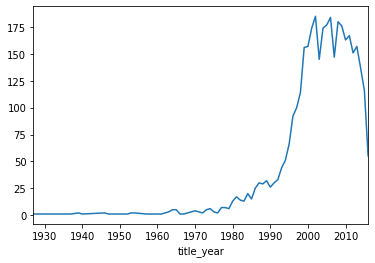

In [146]:
movieYears = moviesRawData.groupby('title_year')['movie_title'].count()

plt.figure()

movieYears.plot()

plt.savefig('./output/movieYears.png')

plt.show()

# 很有可能是因为爬取的数据不全导致

# 电影类型分析

In [154]:
genreData = pd.DataFrame(columns=['genre', 'gross'])

for i,rowData in moviesRawData.iterrows():
    genres = rowData['genres'].split('|')
    n_genres = len(genres)
    
    dictObj = {}
    dictObj['gross'] = [rowData['gross']] * n_genres
    dictObj['genre'] = genres
    
    genreDf = pd.DataFrame(dictObj)
    
    genreData = genreData.append(genreDf)
    
genreData.to_csv('./output/genreData.csv')

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## 按题材统计电影数量

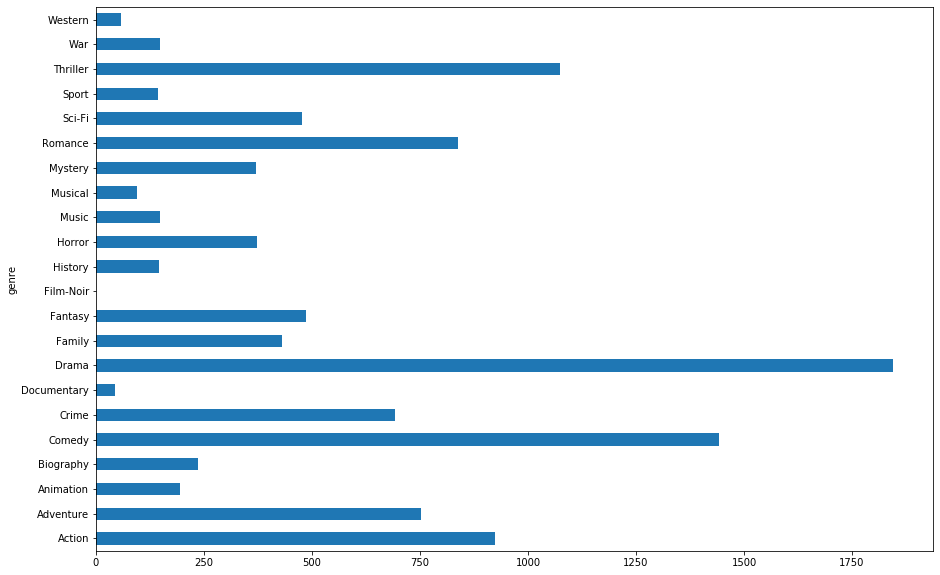

In [157]:
genreCount = genreData.groupby('genre').size()

plt.figure(figsize=(15.0, 10.0))

genreCount.plot(kind='barh')

plt.savefig('./output/genreCount.png')

plt.show()

## 按题材统计票房

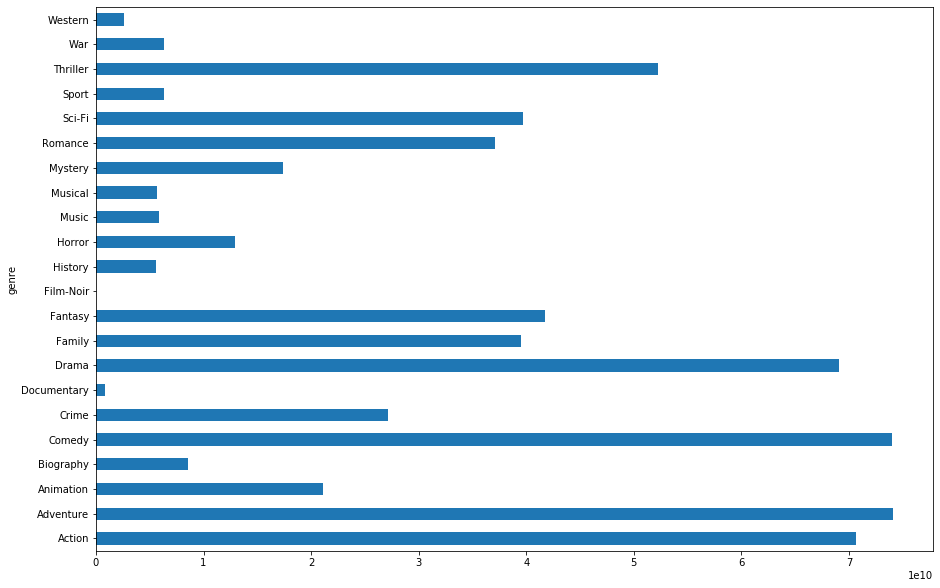

In [160]:
genreGross = genreData.groupby('genre')['gross'].sum()

plt.figure(figsize=(15.0, 10.0))

genreGross.plot(kind='barh')

plt.savefig('./output/genreGross.png')

plt.show()

# 写在最后

其实这类似于做练习，根本没有深挖这些数据背后的东西，比如说“导演 VS 票房总收入”这一块，是不是和导演的电影数量有关呢？和电影上映的年份是不是也有关系呢？票房要不要考虑到每年的通货膨胀呢？如果不考虑这些东西，这些数据其实没有意义。